In [93]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

### Reading Paywall Data

- Set **id feature** as the index of the dataframe because it is unique.
- Parse **date features** from string to numpy.datetime to facilitate future analysis.

In [94]:
pw = pd.read_csv('paywall_data.csv', index_col='id', parse_dates=list(range(2,18)))
pw.sort_index(inplace=True)
pw.shape

(55263, 17)

In [95]:
pw.head()

,Paid?,Registration Date,(Pw) Analytics,(Pw) Backup-restore,(Pw) Color-Management,(Pw) Custom-Fonts,(Pw) Downloadable-Publication,(Pw) Email-Thumb,(Pw) Embedding,(Pw) Page-Limit,(Pw) Pdf-dpi,(Pw) Premium Templates,(Pw) Pub-Password,(Pw) Publish-banner,(Pw) Revision-history,(Pw) Storage,(Pw) Unlicensed/View Only
id,,,,,,,,,,,,,,,,,
37854,0,2016-02-24 20:28:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
69884,0,2016-03-17 02:21:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
76916,0,2013-10-28 21:41:00,NaT,NaT,NaT,2015-01-16 02:37:00,NaT,NaT,NaT,NaT,2016-01-14 17:14:00,2016-03-22 17:26:00,NaT,2016-01-14 17:24:00,NaT,2016-04-02 09:29:00,NaT
87031,0,2016-03-09 08:38:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
129541,0,2016-03-29 07:59:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2016-02-01 14:12:00


### Reading Payment Data

- Set **id feature** as the index of the dataframe because it is unique.
- Parse **date feature** from string to numpy.datetime to facilitate future analysis.

In [96]:
pm = pd.read_csv('paywall_payment_data.csv', index_col='id', parse_dates=[1])
pm.sort_index(inplace=True)
pm.shape

(55263, 2)

In [97]:
pm.head(6)

,First Payment Date,First Payment Value
id,,
37854,NaT,NaN
69884,NaT,NaN
76916,NaT,NaN
87031,NaT,NaN
129541,NaT,NaN
136845,2016-03-17 09:42:00,19.95


### Concatenate Data

Concatenate the two tables.

In [98]:
raw_data = pd.concat([pw, pm], axis=1)
raw_data.shape

(55263, 19)

In [99]:
raw_data.head()

,Paid?,Registration Date,(Pw) Analytics,(Pw) Backup-restore,(Pw) Color-Management,(Pw) Custom-Fonts,(Pw) Downloadable-Publication,(Pw) Email-Thumb,(Pw) Embedding,(Pw) Page-Limit,(Pw) Pdf-dpi,(Pw) Premium Templates,(Pw) Pub-Password,(Pw) Publish-banner,(Pw) Revision-history,(Pw) Storage,(Pw) Unlicensed/View Only,First Payment Date,First Payment Value
id,,,,,,,,,,,,,,,,,,,
37854,0,2016-02-24 20:28:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN
69884,0,2016-03-17 02:21:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN
76916,0,2013-10-28 21:41:00,NaT,NaT,NaT,2015-01-16 02:37:00,NaT,NaT,NaT,NaT,2016-01-14 17:14:00,2016-03-22 17:26:00,NaT,2016-01-14 17:24:00,NaT,2016-04-02 09:29:00,NaT,NaT,NaN
87031,0,2016-03-09 08:38:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN
129541,0,2016-03-29 07:59:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2016-02-01 14:12:00,NaT,NaN


- Since it is paywall analysis, we should remove the rows where there are no paywall click records at all. This reduce the size from 55263 rows to 14137 rows. 
- Remove the "Registration Date" which we are not interested in.

In [134]:
# data = raw_data[(~raw_data.iloc[:,2:-2].isnull()).sum(axis=1) != 0]
data = raw_data.drop('Registration Date', axis=1)
data.shape

(55263, 18)

In [135]:
data.head()

,Paid?,(Pw) Analytics,(Pw) Backup-restore,(Pw) Color-Management,(Pw) Custom-Fonts,(Pw) Downloadable-Publication,(Pw) Email-Thumb,(Pw) Embedding,(Pw) Page-Limit,(Pw) Pdf-dpi,(Pw) Premium Templates,(Pw) Pub-Password,(Pw) Publish-banner,(Pw) Revision-history,(Pw) Storage,(Pw) Unlicensed/View Only,First Payment Date,First Payment Value
id,,,,,,,,,,,,,,,,,,
37854,0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN
69884,0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN
76916,0,NaT,NaT,NaT,2015-01-16 02:37:00,NaT,NaT,NaT,NaT,2016-01-14 17:14:00,2016-03-22 17:26:00,NaT,2016-01-14 17:24:00,NaT,2016-04-02 09:29:00,NaT,NaT,NaN
87031,0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN
129541,0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2016-02-01 14:12:00,NaT,NaN


### Conversion Rate

#### Clicks did not end up with a payment

Count clicks without payment

In [180]:
clicks0 = data[data['Paid?']==0]
clicks0 = clicks0.drop(['Paid?', 'First Payment Date', 'First Payment Value'], axis=1)
clicks0 = (~clicks0.isnull()) * 1
clicks0.head()

,(Pw) Analytics,(Pw) Backup-restore,(Pw) Color-Management,(Pw) Custom-Fonts,(Pw) Downloadable-Publication,(Pw) Email-Thumb,(Pw) Embedding,(Pw) Page-Limit,(Pw) Pdf-dpi,(Pw) Premium Templates,(Pw) Pub-Password,(Pw) Publish-banner,(Pw) Revision-history,(Pw) Storage,(Pw) Unlicensed/View Only
id,,,,,,,,,,,,,,,
37854,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
69884,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
76916,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0
87031,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
129541,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [182]:
clicks0_counts = clicks0.sum()
clicks0_counts

(Pw) Analytics                    167
(Pw) Backup-restore                43
(Pw) Color-Management            2231
(Pw) Custom-Fonts                1563
(Pw) Downloadable-Publication    1166
(Pw) Email-Thumb                 1044
(Pw) Embedding                    122
(Pw) Page-Limit                  3022
(Pw) Pdf-dpi                     3822
(Pw) Premium Templates           3227
(Pw) Pub-Password                 242
(Pw) Publish-banner               651
(Pw) Revision-history             135
(Pw) Storage                     2312
(Pw) Unlicensed/View Only         119
dtype: int64

#### Clicks ending up with a payment

- Extract rows ending up with a payment
- Remove irrelevant features

In [187]:
good_clicks = data[data['Paid?']==1]
good_clicks = good_clicks.drop('Paid?', axis=1)
good_clicks.head()

,(Pw) Analytics,(Pw) Backup-restore,(Pw) Color-Management,(Pw) Custom-Fonts,(Pw) Downloadable-Publication,(Pw) Email-Thumb,(Pw) Embedding,(Pw) Page-Limit,(Pw) Pdf-dpi,(Pw) Premium Templates,(Pw) Pub-Password,(Pw) Publish-banner,(Pw) Revision-history,(Pw) Storage,(Pw) Unlicensed/View Only,First Payment Date,First Payment Value
id,,,,,,,,,,,,,,,,,
136845,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2016-03-17 05:52:00,2016-03-17 09:42:00,19.95
333684,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2014-11-28 12:47:00,480.00
424856,NaT,2016-03-09 20:39:00,2016-01-04 12:18:00,NaT,NaT,NaT,NaT,NaT,2016-03-13 00:07:00,NaT,NaT,NaT,NaT,2016-03-09 20:37:00,NaT,2016-03-15 06:21:00,9.95
435231,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2016-02-18 15:59:00,19.95
437065,NaT,NaT,2016-04-20 16:35:00,NaT,2016-02-18 13:40:00,NaT,NaT,2016-02-09 21:33:00,2016-02-02 21:25:00,2016-01-25 16:32:00,NaT,2016-02-02 18:16:00,NaT,NaT,NaT,2016-02-09 21:37:00,71.40


Calculate the time difference between the first payment and the time of click.

In [188]:
delta = -good_clicks.iloc[:,:-1].sub(good_clicks['First Payment Date'], axis=0)
delta = delta.drop('First Payment Date', axis=1)
delta.head()

,(Pw) Analytics,(Pw) Backup-restore,(Pw) Color-Management,(Pw) Custom-Fonts,(Pw) Downloadable-Publication,(Pw) Email-Thumb,(Pw) Embedding,(Pw) Page-Limit,(Pw) Pdf-dpi,(Pw) Premium Templates,(Pw) Pub-Password,(Pw) Publish-banner,(Pw) Revision-history,(Pw) Storage,(Pw) Unlicensed/View Only
id,,,,,,,,,,,,,,,
136845,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,03:50:00
333684,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
424856,NaT,5 days 09:42:00,70 days 18:03:00,NaT,NaT,NaT,NaT,NaT,2 days 06:14:00,NaT,NaT,NaT,NaT,5 days 09:44:00,NaT
435231,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
437065,NaT,NaT,-71 days +05:02:00,NaT,-9 days +07:57:00,NaT,NaT,00:04:00,7 days 00:12:00,15 days 05:05:00,NaT,7 days 03:21:00,NaT,NaT,NaT


Convert the datetime format to integer format in terms of day. Use infinity to denote no clicks or invalid (after-payment) clicks.

In [207]:
diff = delta.applymap(lambda x: x.total_seconds() / 3600 / 24)
diff[diff < 0] = np.inf
diff = diff.fillna(np.inf)
diff.head()

,(Pw) Analytics,(Pw) Backup-restore,(Pw) Color-Management,(Pw) Custom-Fonts,(Pw) Downloadable-Publication,(Pw) Email-Thumb,(Pw) Embedding,(Pw) Page-Limit,(Pw) Pdf-dpi,(Pw) Premium Templates,(Pw) Pub-Password,(Pw) Publish-banner,(Pw) Revision-history,(Pw) Storage,(Pw) Unlicensed/View Only
id,,,,,,,,,,,,,,,
136845,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,0.159722
333684,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
424856,inf,5.404167,70.752083,inf,inf,inf,inf,inf,2.259722,inf,inf,inf,inf,5.405556,inf
435231,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
437065,inf,inf,inf,inf,inf,inf,inf,0.002778,7.008333,15.211806,inf,7.139583,inf,inf,inf


Filter out rows where all entries are infinities. 

In [208]:
idx = (~(diff == np.inf)).sum(axis=1) != 0
valid_diff = diff[idx]
valid_value = good_clicks['First Payment Value'][idx]
valid_diff.shape, valid_value.shape

((1159, 15), (1159,))

Count clicks with payment.

In [209]:
clicks1 = (~(valid_diff == np.inf)) * 1
clicks1.head()

,(Pw) Analytics,(Pw) Backup-restore,(Pw) Color-Management,(Pw) Custom-Fonts,(Pw) Downloadable-Publication,(Pw) Email-Thumb,(Pw) Embedding,(Pw) Page-Limit,(Pw) Pdf-dpi,(Pw) Premium Templates,(Pw) Pub-Password,(Pw) Publish-banner,(Pw) Revision-history,(Pw) Storage,(Pw) Unlicensed/View Only
id,,,,,,,,,,,,,,,
136845,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
424856,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0
437065,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0
720703,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1467763,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0


In [221]:
clicks1_counts = clicks1.sum()
clicks1_counts

(Pw) Analytics                    36
(Pw) Backup-restore               16
(Pw) Color-Management            201
(Pw) Custom-Fonts                179
(Pw) Downloadable-Publication    120
(Pw) Email-Thumb                  89
(Pw) Embedding                    28
(Pw) Page-Limit                  448
(Pw) Pdf-dpi                     415
(Pw) Premium Templates           157
(Pw) Pub-Password                 26
(Pw) Publish-banner               66
(Pw) Revision-history              6
(Pw) Storage                     293
(Pw) Unlicensed/View Only          4
dtype: int64

Model the probability of a paywall causing a user to pay based on the **forgetting curve** raised by **Hermann Ebbinghaus**. 

The reason is that the amount of memory left of the paywall is the basic measure of the probability. Additionaly, the nearer between the paywall and payment, the more likely it is the paywall that leads to the payment. Thus, the probablity of a paywall causing a user to pay should be sharper than the forgetting curve.

In [211]:
def ebbinghaus(d, s):
    return np.exp(- d * 3600 / s)

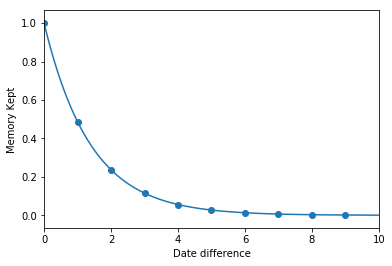

In [212]:
x1 = np.arange(0, 365, 0.1)
plt.plot(x1, ebbinghaus(x1, 5000))
x2 = np.arange(0, 10)
plt.scatter(x2, ebbinghaus(x2, 5000))

plt.xlabel('Date difference')
plt.ylabel('Memory Kept')
plt.xlim(0,10)
plt.show()

Calculate the score (i.e. effective clicks) for each paywall. The scores of paywalls for a single payment can not be above 1.0.

In [214]:
score = valid_diff.applymap(lambda x: ebbinghaus(x, 3000))
# score = score.apply(lambda x: x / x.sum(), axis=1)
score.head()

,(Pw) Analytics,(Pw) Backup-restore,(Pw) Color-Management,(Pw) Custom-Fonts,(Pw) Downloadable-Publication,(Pw) Email-Thumb,(Pw) Embedding,(Pw) Page-Limit,(Pw) Pdf-dpi,(Pw) Premium Templates,(Pw) Pub-Password,(Pw) Publish-banner,(Pw) Revision-history,(Pw) Storage,(Pw) Unlicensed/View Only
id,,,,,,,,,,,,,,,
136845,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.00000,0.0,0.000000,0.825582
424856,0.0,0.001526,1.340642e-37,0.0,0.0,0.0,0.0,0.000000,0.066426,0.000000e+00,0.0,0.00000,0.0,0.001524,0.000000
437065,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.996672,0.000223,1.181180e-08,0.0,0.00019,0.0,0.000000,0.000000
720703,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.00000,0.0,0.212248,0.000000
1467763,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.997503,0.000022,0.000000e+00,0.0,0.00000,0.0,0.000000,0.000000


In [215]:
good_click_counts = score.sum()
good_click_counts

(Pw) Analytics                    12.397216
(Pw) Backup-restore               10.967216
(Pw) Color-Management             64.746219
(Pw) Custom-Fonts                 47.812564
(Pw) Downloadable-Publication     38.628194
(Pw) Email-Thumb                  24.844065
(Pw) Embedding                     5.766108
(Pw) Page-Limit                  298.723094
(Pw) Pdf-dpi                     256.639983
(Pw) Premium Templates            38.879478
(Pw) Pub-Password                  4.438705
(Pw) Publish-banner               27.365485
(Pw) Revision-history              2.982904
(Pw) Storage                     163.843231
(Pw) Unlicensed/View Only          2.809018
dtype: float64

Calculate the conversion rate:

$conversion \ rate = \cfrac{effective \ clicks}{total \ clicks}$

In [226]:
conversion_rate = good_click_counts / (clicks0_counts + clicks1_counts)
conversion_rate

(Pw) Analytics                   0.061070
(Pw) Backup-restore              0.185885
(Pw) Color-Management            0.026623
(Pw) Custom-Fonts                0.027447
(Pw) Downloadable-Publication    0.030037
(Pw) Email-Thumb                 0.021928
(Pw) Embedding                   0.038441
(Pw) Page-Limit                  0.086087
(Pw) Pdf-dpi                     0.060571
(Pw) Premium Templates           0.011489
(Pw) Pub-Password                0.016562
(Pw) Publish-banner              0.038167
(Pw) Revision-history            0.021155
(Pw) Storage                     0.062896
(Pw) Unlicensed/View Only        0.022838
dtype: float64

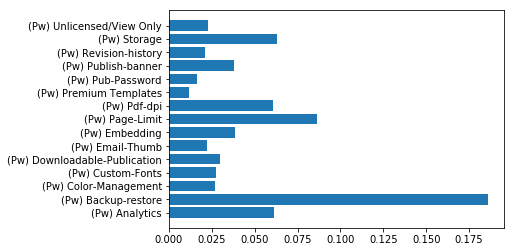

In [227]:
plt.barh(conversion_rate.index, conversion_rate.values)
plt.show()

### Revenue

Concatenate the scores and the values of payment.

In [228]:
socre_value = pd.concat([score, value], axis=1)
socre_value.head()

,(Pw) Analytics,(Pw) Backup-restore,(Pw) Color-Management,(Pw) Custom-Fonts,(Pw) Downloadable-Publication,(Pw) Email-Thumb,(Pw) Embedding,(Pw) Page-Limit,(Pw) Pdf-dpi,(Pw) Premium Templates,(Pw) Pub-Password,(Pw) Publish-banner,(Pw) Revision-history,(Pw) Storage,(Pw) Unlicensed/View Only,First Payment Value
id,,,,,,,,,,,,,,,,
136845,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.00000,0.0,0.000000,0.825582,19.95
424856,0.0,0.001526,1.340642e-37,0.0,0.0,0.0,0.0,0.000000,0.066426,0.000000e+00,0.0,0.00000,0.0,0.001524,0.000000,9.95
437065,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.996672,0.000223,1.181180e-08,0.0,0.00019,0.0,0.000000,0.000000,71.40
720703,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.00000,0.0,0.212248,0.000000,160.00
1467763,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.997503,0.000022,0.000000e+00,0.0,0.00000,0.0,0.000000,0.000000,71.40


Distribute the values of payment to the paywall based on their scores.

In [229]:
distributed_revenue = socre_value.apply(lambda x: x * x[-1], axis=1)
distributed_revenue = distributed_revenue.drop('First Payment Value', axis=1)
distributed_revenue.head()

,(Pw) Analytics,(Pw) Backup-restore,(Pw) Color-Management,(Pw) Custom-Fonts,(Pw) Downloadable-Publication,(Pw) Email-Thumb,(Pw) Embedding,(Pw) Page-Limit,(Pw) Pdf-dpi,(Pw) Premium Templates,(Pw) Pub-Password,(Pw) Publish-banner,(Pw) Revision-history,(Pw) Storage,(Pw) Unlicensed/View Only
id,,,,,,,,,,,,,,,
136845,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.000000,16.470361
424856,0.0,0.015185,1.333939e-36,0.0,0.0,0.0,0.0,0.000000,0.660939,0.000000e+00,0.0,0.000000,0.0,0.015160,0.000000
437065,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,71.162396,0.015896,8.433626e-07,0.0,0.013579,0.0,0.000000,0.000000
720703,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,33.959676,0.000000
1467763,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,71.221723,0.001580,0.000000e+00,0.0,0.000000,0.0,0.000000,0.000000


Sum up the distrubuted revenues for each paywall.

In [232]:
revenue = distributed_revenue.sum()
revenue

(Pw) Analytics                    562.108081
(Pw) Backup-restore               316.827429
(Pw) Color-Management            2748.526098
(Pw) Custom-Fonts                2889.021870
(Pw) Downloadable-Publication    2675.744310
(Pw) Email-Thumb                 1133.083492
(Pw) Embedding                    560.674218
(Pw) Page-Limit                  8117.017118
(Pw) Pdf-dpi                     9125.260266
(Pw) Premium Templates            994.629560
(Pw) Pub-Password                 246.039308
(Pw) Publish-banner               586.797656
(Pw) Revision-history              39.089699
(Pw) Storage                     6055.385318
(Pw) Unlicensed/View Only         107.361452
dtype: float64

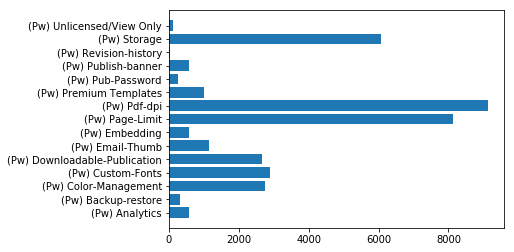

In [233]:
plt.barh(revenue.index, revenue.values)
plt.show()